# Project: Medical Appointment No-Show Analysis

# Goal: Understand which factors influence whether a patient misses their medical appointment and prepare the data for modeling.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1️ Load the dataset
# This dataset contains patient appointment records including age,
# health conditions, whether they received SMS reminders, and
# whether they showed up for the appointment.

In [58]:
data = pd.read_csv(r"C:\Users\prach\Downloads\archive (1)\KaggleV2-May-2016.csv")

In [59]:
data.shape      
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# 2️Fix Incorrect Data Types
# Some numeric-looking columns like patient ID are actually identifiers
# and should not be treated as numbers, so we convert them.

In [60]:
data['PatientId'] = data['PatientId'].astype("object")
data['AppointmentID'] = data['AppointmentID'].astype("object")

# Convert date columns to proper datetime format for time calculations later

In [61]:
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])


# Statistical summary


In [62]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 3️Check for Duplicate and Missing Data

In [63]:
duplicate = data.duplicated(keep="first")
duplicate.sum()      # Shows how many duplicate rows exist


np.int64(0)

In [64]:
data.isnull().sum()  # Check for missing values


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# 4️ Identify Numeric Columns for Analysis

In [65]:
num_col = data.select_dtypes(include=np.number)
num_col.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0


# 5️ Boxplot Analysis (Outlier Detection)
# Boxplots help visualize extreme values

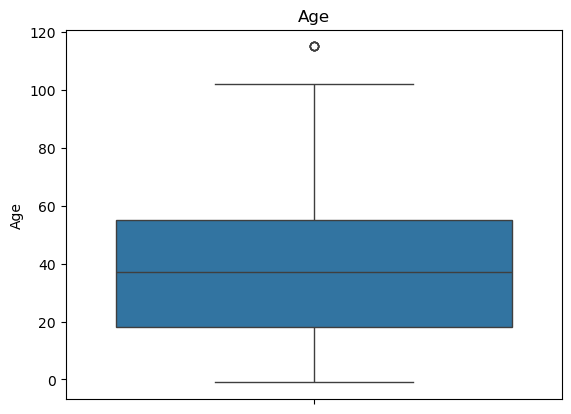

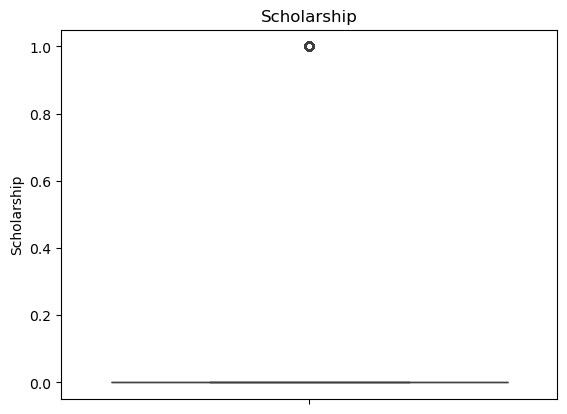

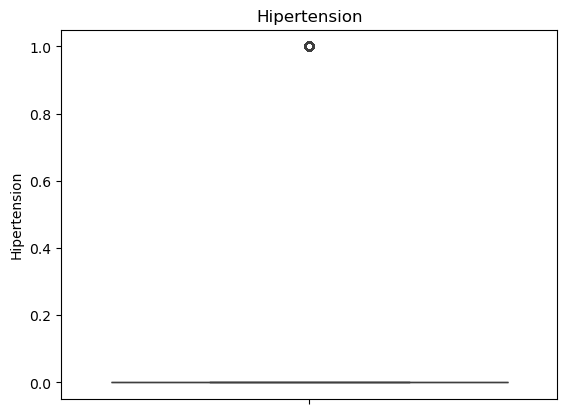

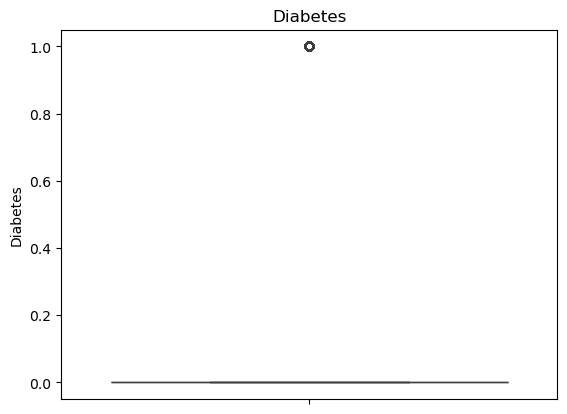

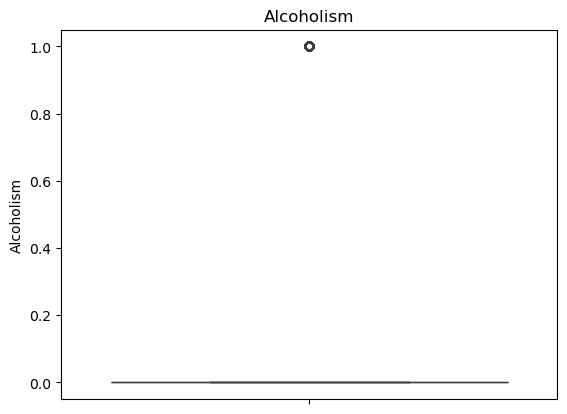

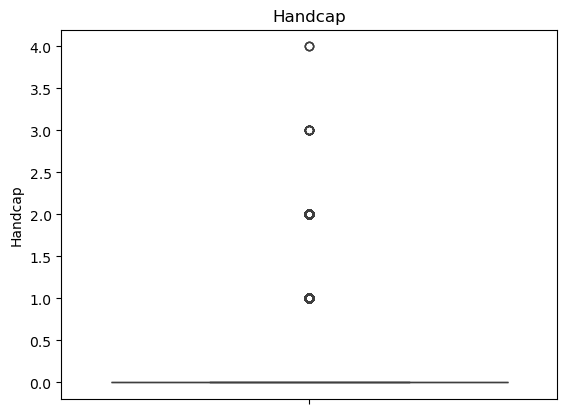

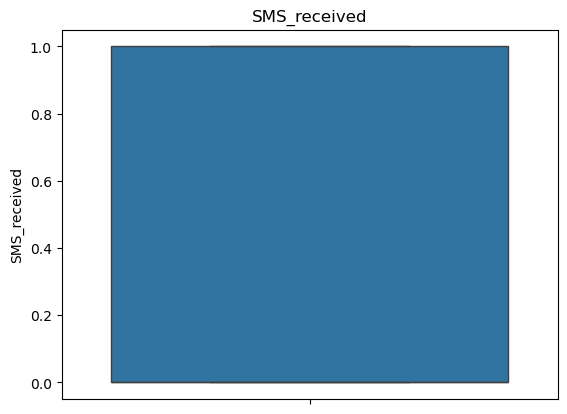

In [66]:
for col in num_col.columns:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

# 6️Outlier Treatment (Using IQR Method)
# Age column had outliers (like negative values or very high ages),
# so we remove unrealistic values using the IQR formula.

In [67]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data = data[(data['Age'] >= lower_limit) & (data['Age'] <= upper_limit)]

<Axes: ylabel='Age'>

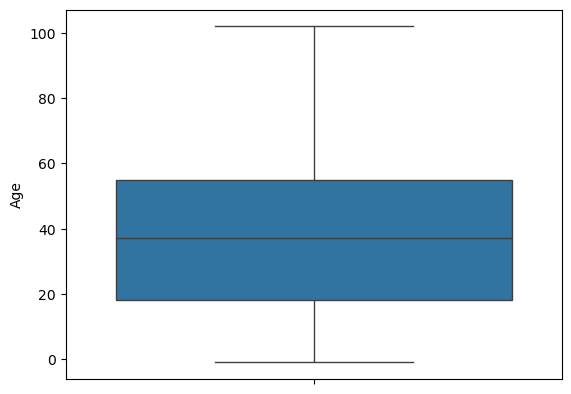

In [68]:
sns.boxplot(data['Age'])


# 7️Histogram Analysis (Understanding Distributions)
# Histograms show how values are distributed — whether skewed, normal,
# or dominated by zeros.

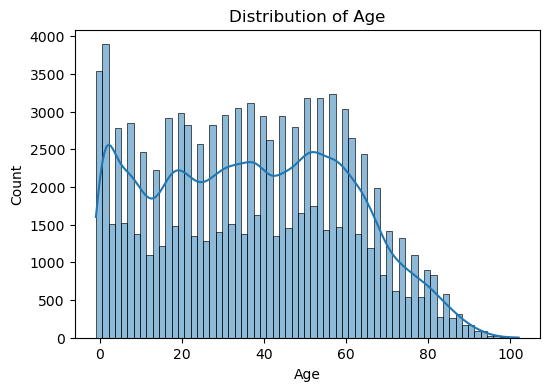

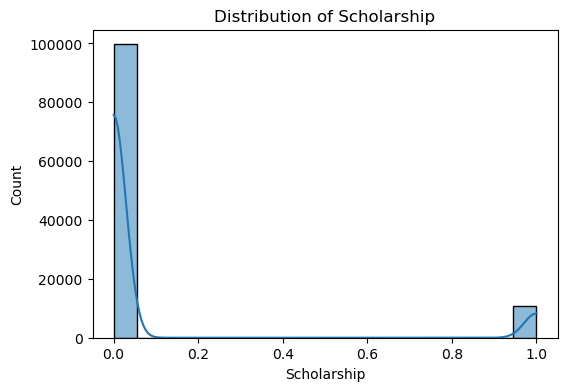

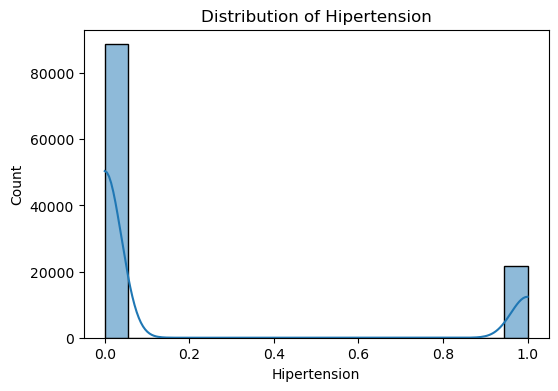

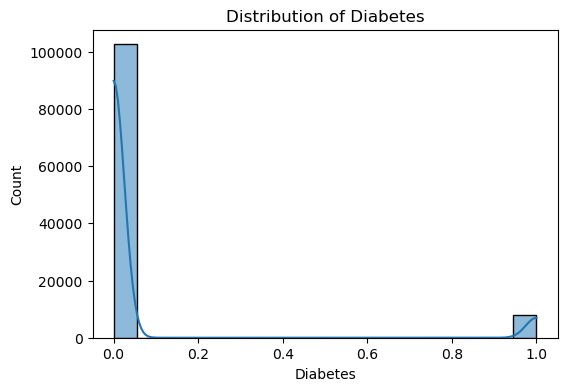

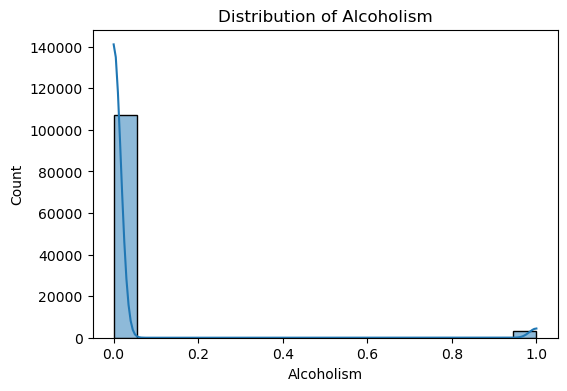

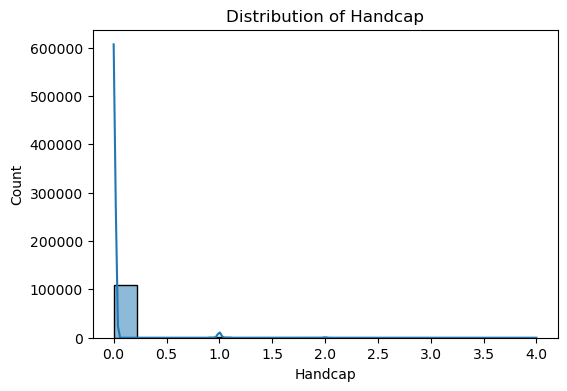

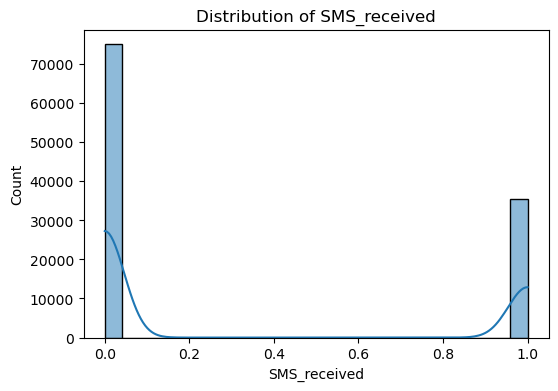

In [69]:
for col in num_col.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 8️ Visualizing Categorical Features
# Countplots and pie charts help understand how many patients
# had conditions like diabetes, hypertension, etc.

<Axes: xlabel='Hipertension', ylabel='count'>

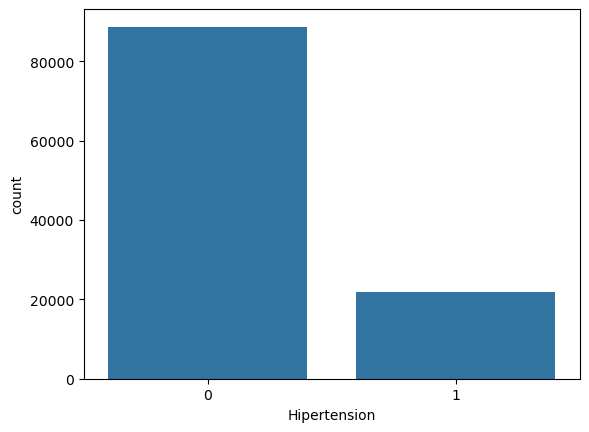

In [70]:
sns.countplot(x=data['Hipertension'])


<Axes: ylabel='count'>

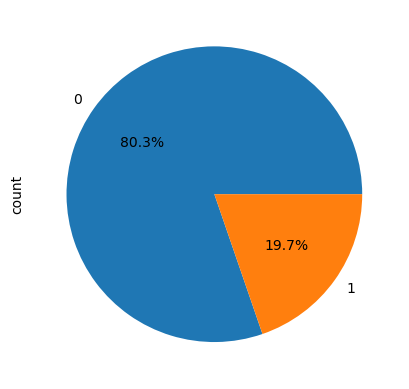

In [71]:
data['Hipertension'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Diabetes', ylabel='count'>

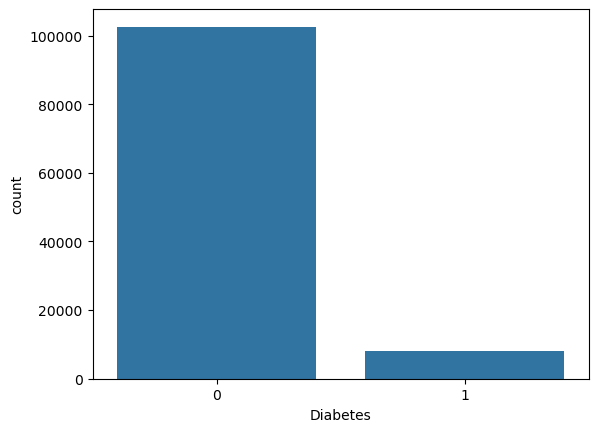

In [72]:
sns.countplot(x=data['Diabetes'])


<Axes: ylabel='count'>

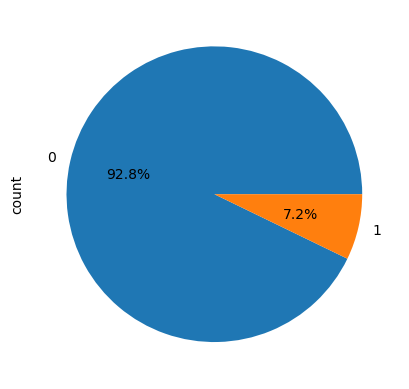

In [73]:
data['Diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Alcoholism', ylabel='count'>

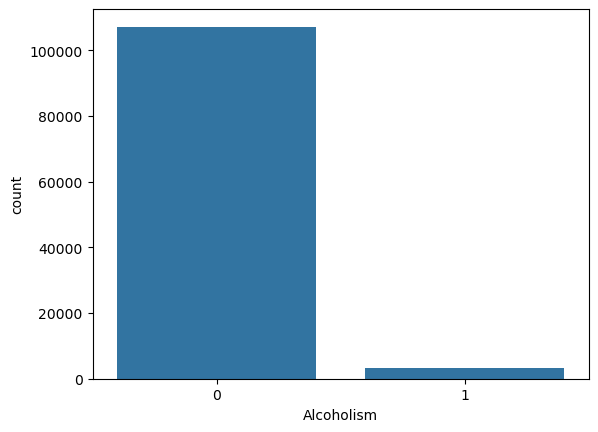

In [74]:
sns.countplot(x=data['Alcoholism'])


<Axes: ylabel='count'>

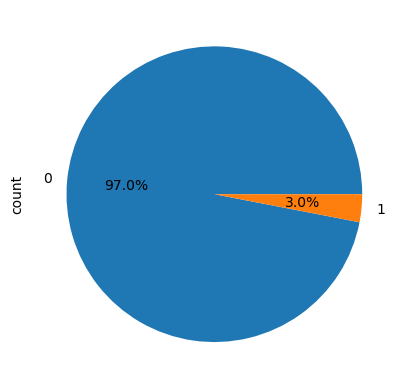

In [75]:
data['Alcoholism'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Handcap', ylabel='count'>

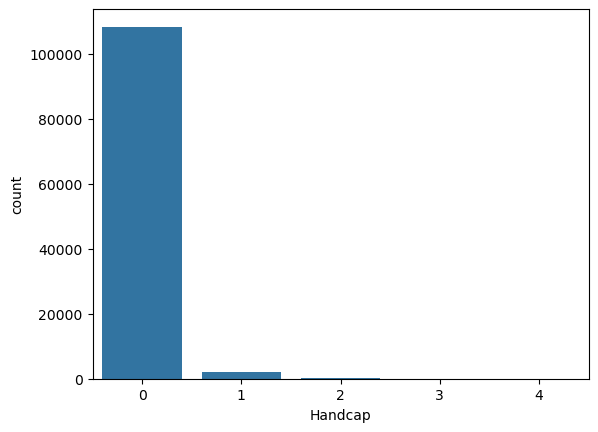

In [76]:
sns.countplot(x=data['Handcap'])


<Axes: ylabel='count'>

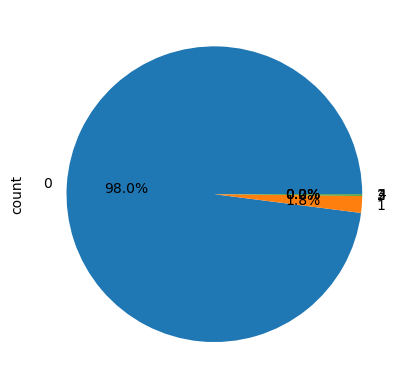

In [77]:
data['Handcap'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='SMS_received', ylabel='count'>

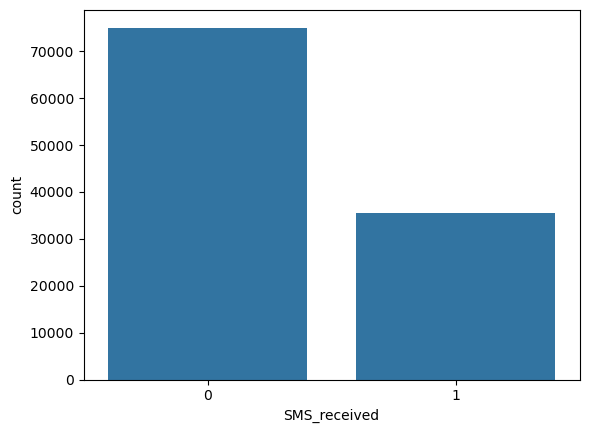

In [78]:
sns.countplot(x=data['SMS_received'])


<Axes: ylabel='count'>

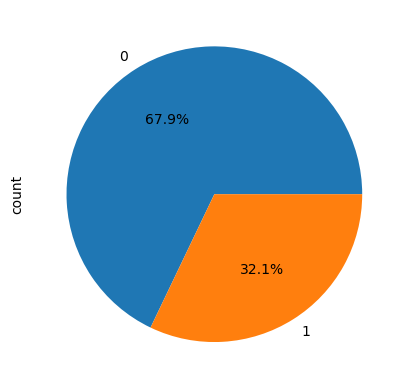

In [79]:
data['SMS_received'].value_counts().plot(kind='pie', autopct='%1.1f%%')

 #️Correlation Analysis

# A heatmap is used to check whether numeric variables are related.
# Strong correlation may help in prediction.


In [80]:
corr = num_col.corr()

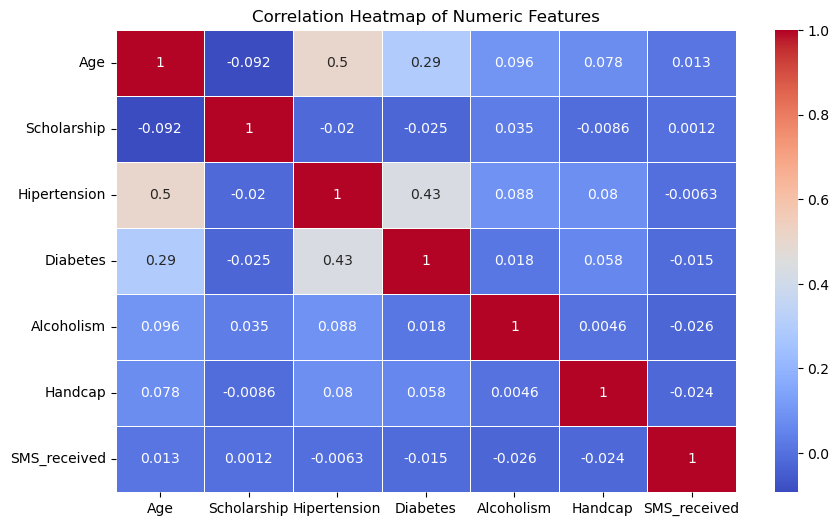

In [81]:

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#  Feature Engineering (Creating New Meaningful Columns)
# Calculate how many days passed between scheduling and the appointment.
# This may affect whether a patient misses their appointment.

In [82]:
data['waiting_days'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Convert No-show column to numerical values:
# Yes → 1 (patient did NOT show)
# No  → 0 (patient came)

In [83]:
data['No-show'] = data['No-show'].apply(lambda x: 1 if x=='Yes' else 0)

In [84]:
#export final datasetto csv file 

In [85]:
data.to_csv("processed_medical_appointments.csv", index=False)
